<a href="https://colab.research.google.com/github/2000siddharth/datascience/blob/master/siddharth_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [47]:
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

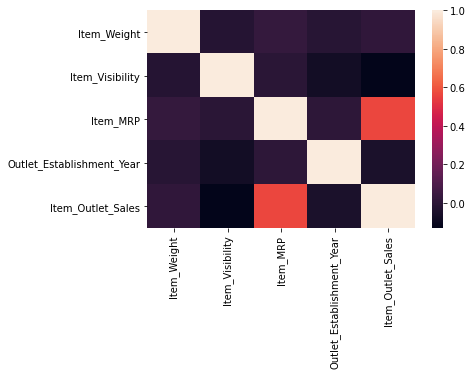

In [8]:
sns.heatmap(df.corr())

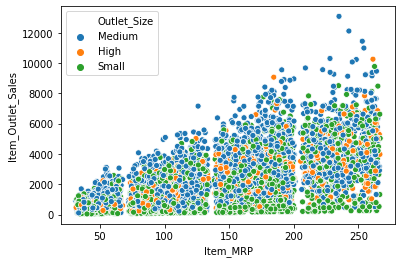

In [11]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue = 'Outlet_Size',data=df)

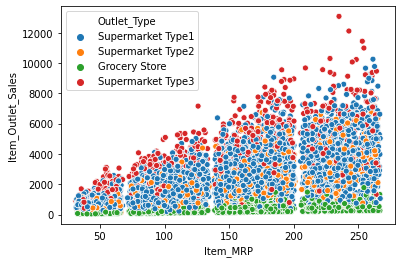

In [12]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue = 'C',data=df)

In [48]:
dummy = pd.get_dummies(df['Outlet_Size'])
dummy

,High,Medium,Small
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,0
4,1,0,0
...,...,...,...
8518,1,0,0
8519,0,0,0
8520,0,0,1
8521,0,1,0


In [49]:
df = pd.concat([df, dummy], axis=1)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,High,Medium,Small
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0,1,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,1,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0,1,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0,0,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1,0,0


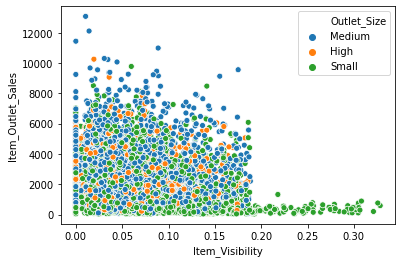

In [20]:
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales',hue = 'Outlet_Size',data=df)

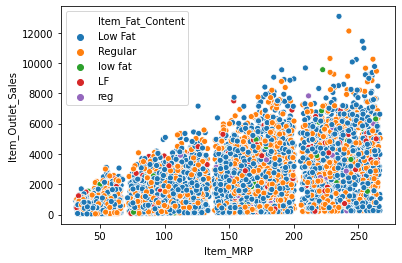

In [30]:
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales',hue = 'Item_Fat_Content',data=df)

In [46]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
High                         0
Medium                       0
Small                        0
dtype: int64

In [50]:
df['Item_Weight'].fillna(value=df['Item_Weight'].mean(), axis=0, inplace=True)

In [51]:
dfcopy = df.copy()

In [52]:
df.drop(['Item_Type', 'Outlet_Identifier', 'Outlet_Size'], axis=1, inplace=True)

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,High,Medium,Small
0,FDA15,9.30,Low Fat,0.016047,249.8092,1999,Tier 1,Supermarket Type1,3735.1380,0,1,0
1,DRC01,5.92,Regular,0.019278,48.2692,2009,Tier 3,Supermarket Type2,443.4228,0,1,0
2,FDN15,17.50,Low Fat,0.016760,141.6180,1999,Tier 1,Supermarket Type1,2097.2700,0,1,0
3,FDX07,19.20,Regular,0.000000,182.0950,1998,Tier 3,Grocery Store,732.3800,0,0,0
4,NCD19,8.93,Low Fat,0.000000,53.8614,1987,Tier 3,Supermarket Type1,994.7052,1,0,0


In [53]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [56]:
X.drop('Item_Identifier', inplace=True, axis=1)

In [57]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,High,Medium,Small
0,9.30,0.016047,249.8092,1999,Tier 1,Supermarket Type1,0,1,0
1,5.92,0.019278,48.2692,2009,Tier 3,Supermarket Type2,0,1,0
2,17.50,0.016760,141.6180,1999,Tier 1,Supermarket Type1,0,1,0
3,19.20,0.000000,182.0950,1998,Tier 3,Grocery Store,0,0,0
4,8.93,0.000000,53.8614,1987,Tier 3,Supermarket Type1,1,0,0


In [59]:
dummy = pd.get_dummies(df['Outlet_Type'])
X = pd.concat([X, dummy], axis=1)
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.016047,249.8092,1999,Tier 1,Supermarket Type1,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,Tier 3,Supermarket Type2,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,Tier 1,Supermarket Type1,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,Tier 3,Grocery Store,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,Tier 3,Supermarket Type1,1,0,0,0,0,1,0,1,0,0


In [60]:
X.drop(['Outlet_Location_Type', 'Outlet_Type'], axis=1, inplace=True)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [65]:
X_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
count,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.881405,0.066097,141.905134,1997.856850,0.109123,0.327515,0.279554,0.275154,0.328395,0.396451,0.125990,0.652097,0.110296,0.111616
std,4.225953,0.051429,62.547789,8.395692,0.311816,0.469341,0.448813,0.446625,0.469664,0.489196,0.331862,0.476340,0.313282,0.314917
min,4.555000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.395000,0.026939,94.175200,1987.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.857645,0.054129,144.262800,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,16.100000,0.094791,186.855600,2004.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,21.350000,0.328391,266.888400,2009.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
linreg = LinearRegression(normalize=True)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [74]:
y_pred = linreg.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score

In [76]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1067.6083534179843


In [77]:
print(r2_score(y_test, y_pred))

0.5806474801591006


In [78]:
coef = pd.Series(linreg.coef_, X.columns).sort_values()
coef

Grocery Store               -1516.920402
Item_Visibility              -445.633537
Supermarket Type2            -372.664994
Tier 3                       -142.928340
Item_Weight                    -2.037871
Item_MRP                       15.646103
Outlet_Establishment_Year      26.018410
Supermarket Type1              34.013470
Tier 2                         72.854848
Tier 1                         90.908926
Small                         136.792989
Medium                        209.424712
High                          726.274668
Supermarket Type3            1975.546984
dtype: float64

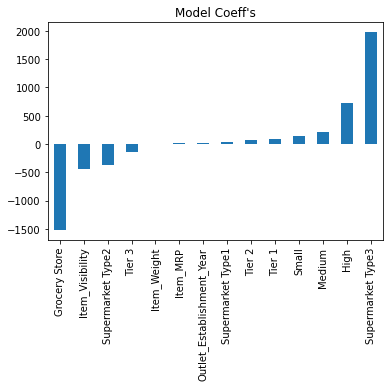

In [79]:
coef.plot(kind='bar', title =  'Model Coeff\'s')

In [80]:
ridge = Ridge(alpha=0.05, normalize=True)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print ('RMSE is', rmse,'\nR2 error is', r2)

RMSE is 1070.6161277592503 
R2 error is 0.5782812669291082


In [82]:
df_coeff = pd.DataFrame(columns=['LinearRegression', 'Ridge'])

for i in range(len(ridge.coef_)):
  df_coeff = df_coeff.append({'LinearRegression' : linreg.coef_[i],
                  'Ridge' : ridge.coef_[i]}, ignore_index=True)
df_coeff

,LinearRegression,Ridge
0,-2.037871,-1.733603
1,-445.633537,-577.907348
2,15.646103,14.892816
3,26.018410,-4.261939
4,726.274668,37.722730
5,209.424712,306.425757
6,136.792989,119.645811
7,90.908926,-136.103526
8,72.854848,88.810138
9,-142.928340,31.586034


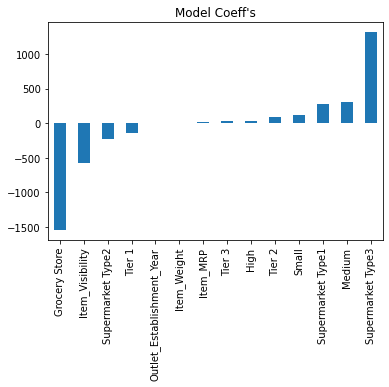

In [83]:
coef_ridge = pd.Series(ridge.coef_, X.columns).sort_values()

coef_ridge.plot(kind='bar', title =  'Model Coeff\'s')
plt.show()

In [84]:
lasso = Lasso(alpha=0.01, normalize=True)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print ('RMSE is', rmse,'\nR2 error is', r2)

RMSE is 1068.204520890604 
R2 error is 0.5801790047410287


In [85]:
df_coeff = pd.DataFrame(columns=['LinearRegression', 'Ridge', 'Lasso'])

for i in range(len(lasso.coef_)):
  df_coeff = df_coeff.append({'LinearRegression' : linreg.coef_[i],
                  'Ridge' : ridge.coef_[i],
                  'Lasso' : lasso.coef_[i]}, ignore_index=True)

In [86]:
df_coeff

,LinearRegression,Ridge,Lasso
0,-2.037871,-1.733603,-1.790857
1,-445.633537,-577.907348,-431.985619
2,15.646103,14.892816,15.629948
3,26.018410,-4.261939,12.792986
4,726.274668,37.722730,395.723048
5,209.424712,306.425757,210.048047
6,136.792989,119.645811,121.634951
7,90.908926,-136.103526,0.000000
8,72.854848,88.810138,60.894076
9,-142.928340,31.586034,-60.148333


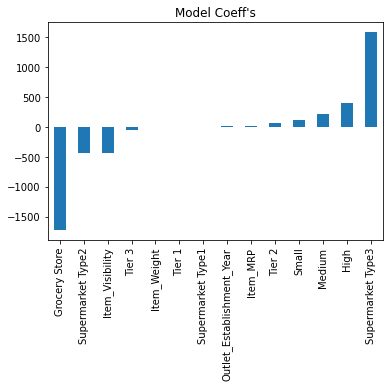

In [87]:
lassocoeff = pd.Series(lasso.coef_, X.columns).sort_values()

lassocoeff.plot(kind='bar', title =  'Model Coeff\'s')
plt.show()

Param Tuning

In [88]:
from sklearn.model_selection import GridSearchCV

In [90]:
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.005,0.003,0.05]}
ridge_gs = GridSearchCV(ridge, param_grid=params_Ridge, scoring='r2', n_jobs=-1)
ridge_gs.fit(X_train, y_train)
ridge_gs.best_params_

{'alpha': 0.001}

In [91]:
ridge_best = Ridge(alpha=0.001)
ridge_best.fit(X_train, y_train)

y_pred = ridge_best.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print ('RMSE is', rmse,'\nR2 error is', r2)

RMSE is 1067.6085636365615 
R2 error is 0.5806473150129616


In [93]:
params_lasso = {'alpha': [1,0.1,0.01,0.001,0.005,0.003,0.05]}
lasso_gs = GridSearchCV(lasso, param_grid=params_lasso, scoring='r2', n_jobs=-1)
lasso_gs.fit(X_train, y_train)
lasso_gs.best_params_

{'alpha': 0.003}

In [94]:
lasso_best = Lasso(alpha=0.003)
lasso_best.fit(X_train, y_train)

y_pred = lasso_best.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print ('RMSE is', rmse,'\nR2 error is', r2)

RMSE is 1067.6104481230234 
R2 error is 0.5806458345730663


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7037286.687443733, tolerance: 2016798.6508341576
  positive)


In [95]:
test = pd.read_csv('Test.csv')

In [107]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 1,Tier 2,Tier 3,High,Medium,Small
0,20.750000,0.007565,107.8622,1999,0,1,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,2007,0,1,0,0,0,1,0,0,0,0
2,14.600000,0.099575,241.7538,1998,1,0,0,0,0,0,1,0,0,0
3,7.315000,0.015388,155.0340,2007,0,1,0,0,0,1,0,0,0,0
4,12.695633,0.118599,234.2300,1985,0,0,0,1,0,0,1,0,1,0


In [97]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0.016047,249.8092,1999,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,1,0,0,0,0,1,0,1,0,0


In [98]:
test.drop(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier'], axis=1, inplace=True)

In [100]:
test['Item_Weight'].fillna(value=test['Item_Weight'].mean(), axis=0, inplace=True)

In [105]:
dummy = pd.get_dummies(test['Outlet_Size'])
test = pd.concat([test, dummy], axis=1)
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Tier 1,Tier 2,Tier 3,High,Medium,Small
0,20.750000,0.007565,107.8622,1999,Medium,Tier 1,Supermarket Type1,0,1,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,2007,NaN,Tier 2,Supermarket Type1,0,1,0,0,0,1,0,0,0,0
2,14.600000,0.099575,241.7538,1998,NaN,Tier 3,Grocery Store,1,0,0,0,0,0,1,0,0,0
3,7.315000,0.015388,155.0340,2007,NaN,Tier 2,Supermarket Type1,0,1,0,0,0,1,0,0,0,0
4,12.695633,0.118599,234.2300,1985,Medium,Tier 3,Supermarket Type3,0,0,0,1,0,0,1,0,1,0


In [106]:
test.drop(['Outlet_Size','Outlet_Location_Type','Outlet_Type'], axis=1, inplace=True)

In [108]:
ypred = linreg.predict(test)

In [109]:
ypred

array([1430.31019566, 1485.54875144, 2770.44340917, ..., 1828.01646608,
       3480.1885405 , 1205.75095655])